In [67]:
import database
from node import *
from whispers import *
import TakePicture
from matplotlib.patches import Rectangle
from matplotlib import pyplot as plt
import numpy as np
import os.path
import pickle
from main import match_face
from database import *

In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
savefile = open('database.dict', 'rb')
db = pickle.load(savefile)
savefile.close()

In [7]:
allds=list()

No camera config found, using defaults
	 port=0, exposure=0.7


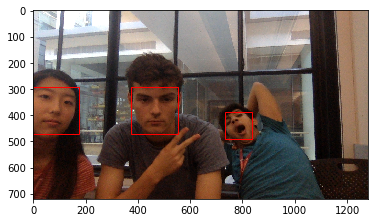

In [15]:
picture = TakePicture.take_pic()
fig, ax = plt.subplots()
rectangles = TakePicture.find_rectangles(picture)

for r in rectangles:
    rect = Rectangle((r[0], r[1]), r[2], r[3], linewidth=1, edgecolor='r', facecolor='none')

    ax.add_patch(rect)
ax.imshow(picture)
ds = TakePicture.get_descriptor(picture)
allds.extend(ds)

In [17]:
th=0.39

In [20]:
namelist=list()
for ind, d in enumerate(allds):
    name = match_face(d,db,th)
    namelist.append(name)

In [21]:
print(namelist)

['aneesh', 'aneesh', 'prazul', 'aneesh', 'prazul', 'aneesh', 'prazul', 'cooper', 'cooper', 'jiin', 'unknown']


In [68]:
graph = make_graph(allds,namelist,0.39)

In [69]:
for thing in graph:
    print(len(thing.neighbors))

3
3
2
3
2
3
2
1
1
0
0


2


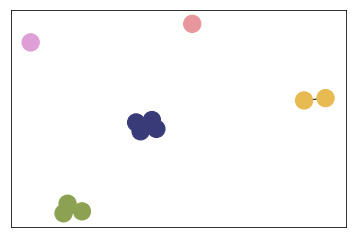

In [70]:
whispers_algor(graph)

In [71]:
print(list(i.label for i in graph))

[1, 1, 4, 1, 4, 1, 4, 8, 8, 9, 10]


In [72]:
print(namelist)

['aneesh', 'aneesh', 'prazul', 'aneesh', 'prazul', 'aneesh', 'prazul', 'cooper', 'cooper', 'jiin', 'unknown']


In [73]:
graph=graph[:10]
namelist=namelist[:10]

In [75]:
lmtm=0
lmtd=0
ldtm=0
for i in range(len(graph)):
    for j in range(i+1, len(graph)):
        lm=graph[i].label==graph[j].label
        tm=namelist[i]==namelist[j]
        if lm and tm:
            lmtm+=1
        if lm and not tm:
            lmtd+=1
        if not lm and tm:
            ldtm+=1
precision=lmtm/(lmtm+ldtm)
recall=lmtm/(lmtm+lmtd)

In [76]:
print(precision)
print(recall)

1.0
1.0
